In [1]:
import pandas as pd

In [3]:
weather_df = pd.read_json(r'C:\Users\svsta\big_contest\datas\out_data\final_weather.json')

In [11]:
popul_df = pd.read_csv(r'C:\Users\svsta\big_contest\datas\out_data\pub.csv', header=None)

In [16]:
popul_df.columns = ['0', 'Name', 'Gwon','1','total','2','3','4','5']

In [18]:
popul_df = popul_df[['Name', 'total']]

In [19]:
popul_df.dropna(inplace=True)

In [41]:
tokens = list(map(lambda i: set(i), weather_df['loc'].unique()))

In [50]:
temp = {}
for j in popul_df['Name']:
    tl = []
    for t in tokens:
        count = 0
        for i in t:
            if i in j:
                count+=1
        if count > 1:
            tl.append(t)
    temp[j] = tl

In [58]:
temp['서울특별시'][0]

['서', '울']

In [59]:
temp['서울특별시'] = temp['서울특별시'][0]

In [65]:
temp[i]

{'서', '울'}

In [69]:
temp[i] = set(temp[i][s])

TypeError: 'set' object is not subscriptable

In [75]:
temp[i]

{'서', '울'}

In [107]:
temp

{'서울특별시': {'서', '울'},
 '부산광역시': [{'부', '산'}, {'산', '시', '양'}, {'광', '시', '양'}],
 '인천광역시': [{'인', '천'}, {'광', '시', '양'}],
 '대구광역시': [{'구', '대'}, {'광', '시', '양'}],
 '대전광역시': [{'대', '전'}, {'광', '시', '양'}],
 '광주광역시': [{'광', '주'}, {'광', '시', '양'}, {'경', '시', '주'}],
 '경기도\xa0수원시': [{'수', '원'}, {'경', '시', '주'}],
 '울산광역시': [{'산', '울'}, {'산', '시', '양'}, {'광', '시', '양'}],
 '경기도\xa0고양시': [{'산', '시', '양'}, {'광', '시', '양'}, {'경', '시', '주'}],
 '경기도\xa0용인시': [{'경', '시', '주'}],
 '경상남도\xa0창원시': [{'원', '창'}, {'남', '원'}, {'북', '원', '창'}, {'경', '시', '주'}],
 '경기도\xa0성남시': [{'경', '시', '주'}],
 '충청북도\xa0청주시': [{'주', '충'}, {'주', '청'}, {'경', '시', '주'}],
 '경기도\xa0부천시': [{'경', '시', '주'}],
 '경기도\xa0화성시': [{'경', '시', '주'}],
 '경기도\xa0남양주시': [{'산', '시', '양'}, {'광', '시', '양'}, {'경', '시', '주'}],
 '전라북도\xa0전주시': [{'전', '주'}, {'경', '시', '주'}],
 '충청남도\xa0천안시': [{'안', '천'}],
 '경기도\xa0안산시': [{'도', '산', '흑'}, {'산', '시', '양'}, {'경', '시', '주'}],
 '경기도\xa0안양시': [{'산', '시', '양'}, {'광', '시', '양'}, {'경', '시', '주'}],
 '경상남도\xa0김해시'

In [109]:
result = []
for i in temp:
    print(i, temp[i])
    if temp[i] == []:
        result.append(None)
        continue
    s = int(input('선택하세요'))
    print(s)
    if s == -1:
        result.append(None)
        continue
    elif s == 10:
        result.append(temp[i])
    else:
        result.append(temp[i][s])

서울특별시 {'서', '울'}
10
부산광역시 [{'산', '부'}, {'시', '산', '양'}, {'시', '광', '양'}]
0
인천광역시 [{'천', '인'}, {'시', '광', '양'}]
0
대구광역시 [{'대', '구'}, {'시', '광', '양'}]
0
대전광역시 [{'전', '대'}, {'시', '광', '양'}]
0
광주광역시 [{'광', '주'}, {'시', '광', '양'}, {'시', '경', '주'}]
0
경기도 수원시 [{'수', '원'}, {'시', '경', '주'}]
0
울산광역시 [{'산', '울'}, {'시', '산', '양'}, {'시', '광', '양'}]
0
경기도 고양시 [{'시', '산', '양'}, {'시', '광', '양'}, {'시', '경', '주'}]
-1
경기도 용인시 [{'시', '경', '주'}]
-1
경상남도 창원시 [{'창', '원'}, {'원', '남'}, {'창', '북', '원'}, {'시', '경', '주'}]
0
경기도 성남시 [{'시', '경', '주'}]
-1
충청북도 청주시 [{'주', '충'}, {'주', '청'}, {'시', '경', '주'}]
1
경기도 부천시 [{'시', '경', '주'}]
-1
경기도 화성시 [{'시', '경', '주'}]
-1
경기도 남양주시 [{'시', '산', '양'}, {'시', '광', '양'}, {'시', '경', '주'}]
-1
전라북도 전주시 [{'전', '주'}, {'시', '경', '주'}]
0
충청남도 천안시 [{'안', '천'}]
0
경기도 안산시 [{'흑', '산', '도'}, {'시', '산', '양'}, {'시', '경', '주'}]
-1
경기도 안양시 [{'시', '산', '양'}, {'시', '광', '양'}, {'시', '경', '주'}]
-1
경상남도 김해시 [{'시', '김', '해'}, {'해', '남'}, {'시', '경', '주'}, {'해', '남'}]
0
경기도 평택시 [{'시', '경', '주'}]
-1
경상북도 

In [114]:
result = list(map(lambda i: ''.join(list(i)) if i != None else None, result))

In [115]:
result

['서울',
 '산부',
 '천인',
 '대구',
 '전대',
 '광주',
 '수원',
 '산울',
 None,
 None,
 '창원',
 None,
 '주청',
 None,
 None,
 None,
 '전주',
 '안천',
 None,
 None,
 '시김해',
 None,
 '항포',
 '주제',
 None,
 '주파',
 None,
 None,
 '미구',
 None,
 '시산양',
 '주원',
 '주진',
 None,
 None,
 None,
 None,
 '춘천',
 None,
 None,
 '산군',
 None,
 '수여',
 '순천',
 '시경주',
 '거제',
 '포목',
 None,
 '이천',
 '강릉',
 None,
 '주충',
 None,
 None,
 '서산',
 '귀서포',
 None,
 '안동',
 None,
 None,
 '시광양',
 None,
 '천제',
 '영통',
 None,
 None,
 None,
 None,
 None,
 '양평',
 '읍정',
 '영주',
 None,
 None,
 '밀양',
 '홍성',
 '보령',
 None,
 '주상',
 '영천',
 '두동천',
 '동해',
 None,
 None,
 '원남',
 None,
 None,
 '속초',
 '문경',
 None,
 None,
 '홍천',
 '해남',
 '여부',
 None,
 None,
 '흥고',
 None,
 '창거',
 None,
 None,
 '금산',
 '창고',
 None,
 None,
 None,
 '안부',
 '의성',
 None,
 '영광군',
 None,
 '울진',
 '도완',
 None,
 '철원',
 '태백',
 None,
 '함양군',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None

In [150]:
temp.keys()

dict_keys(['서울특별시', '부산광역시', '인천광역시', '대구광역시', '대전광역시', '광주광역시', '경기도\xa0수원시', '울산광역시', '경기도\xa0고양시', '경기도\xa0용인시', '경상남도\xa0창원시', '경기도\xa0성남시', '충청북도\xa0청주시', '경기도\xa0부천시', '경기도\xa0화성시', '경기도\xa0남양주시', '전라북도\xa0전주시', '충청남도\xa0천안시', '경기도\xa0안산시', '경기도\xa0안양시', '경상남도\xa0김해시', '경기도\xa0평택시', '경상북도\xa0포항시', '제주특별자치도\xa0제주시', '경기도\xa0시흥시', '경기도\xa0파주시', '경기도\xa0의정부시', '경기도\xa0김포시', '경상북도\xa0구미시', '경기도\xa0광주시', '경상남도\xa0양산시', '강원도\xa0원주시', '경상남도\xa0진주시', '세종특별자치시', '경기도\xa0광명시', '충청남도\xa0아산시', '전라북도\xa0익산시', '강원도\xa0춘천시', '경상북도\xa0경산시', '경기도\xa0군포시', '전라북도\xa0군산시', '경기도\xa0하남시', '전라남도\xa0여수시', '전라남도\xa0순천시', '경상북도\xa0경주시', '경상남도\xa0거제시', '전라남도\xa0목포시', '경기도\xa0오산시', '경기도\xa0이천시', '강원도\xa0강릉시', '경기도\xa0양주시', '충청북도\xa0충주시', '경기도\xa0안성시', '경기도\xa0구리시', '충청남도\xa0서산시', '제주특별자치도\xa0서귀포시', '충청남도\xa0당진시', '경상북도\xa0안동시', '경기도\xa0포천시', '경기도\xa0의왕시', '전라남도\xa0광양시', '경상북도\xa0김천시', '충청북도\xa0제천시', '경상남도\xa0통영시', '충청남도\xa0논산시', '경상북도\xa0칠곡군', '경상남도\xa0사천시', '경기도\xa0여주시', '충청남도\xa0공주시', '경기도\xa0양평군', '전라북도\

In [156]:
result[list(temp.keys()).index('경상북도\xa0울릉군')] = '울릉도'

In [207]:
result[result.index('도완')] = '완도'

In [212]:
popul_df['weather'] = result

In [226]:
weather_df['popul'] = popul_df.dropna().groupby('weather').mean()['total']

In [230]:
ids = weather_df['loc'].unique()

In [233]:
a = pd.DataFrame(ids).set_index(0)
a['popul'] = popul_df.dropna().groupby('weather').mean()['total']

In [242]:
weather_df['popul'] = populs

In [246]:
weather_df.dropna(inplace=True)


In [248]:
weather_df['percen'] = weather_df['popul'] / weather_df['popul'].sum()

In [251]:
weather_df.to_json('weather_percen.json')

In [253]:
weather_df['tem'] * weather_df['percen']

0        -6.204111e-07
1        -4.715125e-07
2        -5.459618e-07
3        -6.204111e-07
4        -9.678414e-07
              ...     
823435   -3.001042e-07
823436   -3.251129e-07
823437   -3.834664e-07
823438   -4.251476e-07
823439    0.000000e+00
Length: 700800, dtype: float64

# Null 데이터 제거

In [257]:
result = list(map(lambda i : None if (i['tem'] == 0) & (i['hum'] == 0) & (i['rain'] == 0) & (i['snow'] == 0) else 'o', weather_df.iloc))

In [259]:
weather_df['dropnull'] = result

In [261]:
weather_df.dropna(inplace=True)

In [278]:
weather_df['fin_tem'] = weather_df['tem'] * weather_df['percen']

In [279]:
weather_df['fin_hum'] = weather_df['hum'] * weather_df['percen']

In [280]:
weather_df['fin_rain'] = weather_df['rain'] * weather_df['percen']

In [281]:
weather_df['fin_snow'] = weather_df['snow'] * weather_df['percen']

In [276]:
weather_df.popul.unique().sum()

36164154.5

In [277]:
weather_df['percen'] = weather_df['popul'] / weather_df['popul'].unique().sum()

In [285]:
weather_df.groupby('time').sum()[['fin_tem', 'fin_hum', 'fin_rain', 'fin_snow']].reset_index().to_json('final_weather.json')

In [286]:
pd.read_json('final_weather.json')

,time,fin_tem,fin_hum,fin_rain,fin_snow
0,2019-01-01 00:00,-3.307244,49.762698,0.0,0.014997
1,2019-01-01 01:00,-3.754777,51.217101,0.0,0.003601
2,2019-01-01 02:00,-4.248918,54.346114,0.0,0.003601
3,2019-01-01 03:00,-4.608119,57.098790,0.0,0.014997
4,2019-01-01 04:00,-4.823198,57.744442,0.0,0.003601
...,...,...,...,...,...
8755,2019-12-31 19:00,-4.247262,39.818355,0.0,0.002406
8756,2019-12-31 20:00,-4.568535,41.758622,0.0,0.002406
8757,2019-12-31 21:00,-5.015240,43.616030,0.0,0.002406
8758,2019-12-31 22:00,-5.524580,44.290348,0.0,0.002406


In [265]:
weather_df

,time,loc,tem,hum,rain,snow,popul,percen,dropnull,fin_tem
0,2019-01-01 00:00,속초,-2.5,20,0.0,0.0,78618.0,2.481645e-07,o,-6.204111e-07
1,2019-01-01 01:00,속초,-1.9,18,0.0,0.0,78618.0,2.481645e-07,o,-4.715125e-07
2,2019-01-01 02:00,속초,-2.2,17,0.0,0.0,78618.0,2.481645e-07,o,-5.459618e-07
3,2019-01-01 03:00,속초,-2.5,18,0.0,0.0,78618.0,2.481645e-07,o,-6.204111e-07
4,2019-01-01 04:00,속초,-3.9,20,0.0,0.0,78618.0,2.481645e-07,o,-9.678414e-07
...,...,...,...,...,...,...,...,...,...,...
823434,2019-12-31 19:00,부안,-3.1,62,0.0,0.0,26409.0,8.336227e-08,o,-2.584230e-07
823435,2019-12-31 20:00,부안,-3.6,68,0.0,0.0,26409.0,8.336227e-08,o,-3.001042e-07
823436,2019-12-31 21:00,부안,-3.9,61,0.0,0.0,26409.0,8.336227e-08,o,-3.251129e-07
823437,2019-12-31 22:00,부안,-4.6,73,0.0,0.0,26409.0,8.336227e-08,o,-3.834664e-07


In [ ]:
weather_df.to_json('final_weather.json')

In [238]:
populs = []
for i in a['popul']:
    populs.extend([i]*8760)

In [240]:
len(populs)

823440

In [224]:
popul_df['total'] = list(map(lambda i: int(i.replace(',', '')), popul_df['total']))

In [ ]:
popul

In [220]:
popul_df.dropna().groupby('weather').mean().set_index('weather')['total']

DataError: No numeric types to aggregate

In [31]:
tokens = list(weather_df['loc'].unique())

In [46]:
popul_df['Name']

0         서울특별시
1         부산광역시
2         인천광역시
3         대구광역시
4         대전광역시
         ...   
157     강원도 양구군
158    경상북도 군위군
159    전라북도 장수군
160    경상북도 영양군
161    경상북도 울릉군
Name: Name, Length: 162, dtype: object

# 날씨 데이터와 시청률 데이터를 통해 Feature 생성

In [132]:
import pandas as pd
weather_df = pd.read_json('final_weather.json')

In [133]:
weather_df

,time,fin_tem,fin_hum,fin_rain,fin_snow
0,2019-01-01 00:00,-3.307244,49.762698,0.0,0.014997
1,2019-01-01 01:00,-3.754777,51.217101,0.0,0.003601
2,2019-01-01 02:00,-4.248918,54.346114,0.0,0.003601
3,2019-01-01 03:00,-4.608119,57.098790,0.0,0.014997
4,2019-01-01 04:00,-4.823198,57.744442,0.0,0.003601
...,...,...,...,...,...
8755,2019-12-31 19:00,-4.247262,39.818355,0.0,0.002406
8756,2019-12-31 20:00,-4.568535,41.758622,0.0,0.002406
8757,2019-12-31 21:00,-5.015240,43.616030,0.0,0.002406
8758,2019-12-31 22:00,-5.524580,44.290348,0.0,0.002406


In [2]:
from Package import loadfile

a,b,c = loadfile.load()

In [3]:
watch_df = b.set_index('시간대').T

In [4]:
watch_df.T

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
시간대,,,,,,,,,,,,,,,,,,,,,
02:00,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.000,...,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000
02:01,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.005,...,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.012
02:02,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.005,...,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000
02:03,0.0,0.0,0.014,0.0,0.000,0.0,0.0,0.0,0.000,0.005,...,0.0,0.000,0.000,0.017,0.0,0.000,0.0,0.0,0.000,0.000
02:04,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.005,...,0.0,0.000,0.000,0.017,0.0,0.000,0.0,0.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01:55,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.004,0.000,...,0.0,0.013,0.000,0.000,0.0,0.015,0.0,0.0,0.000,0.000
01:56,0.0,0.0,0.000,0.0,0.027,0.0,0.0,0.0,0.000,0.000,...,0.0,0.013,0.000,0.000,0.0,0.015,0.0,0.0,0.000,0.000
01:57,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.004,0.000,...,0.0,0.013,0.000,0.000,0.0,0.015,0.0,0.0,0.000,0.000


In [5]:
watch_df = watch_df.T.sort_index()

In [13]:
watch_df.T

시간대,00:00,00:01,00:02,00:03,00:04,00:05,00:06,00:07,00:08,00:09,...,23:50,23:51,23:52,23:53,23:54,23:55,23:56,23:57,23:58,23:59
2019-01-01,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2019-01-02,0.040,0.000,0.023,0.040,0.000,0.000,0.000,0.000,0.015,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.040,0.040,0.040
2019-01-03,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2019-01-04,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2019-01-05,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.027,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.009,0.000
2019-12-28,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2019-12-29,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2019-12-30,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [19]:
co = watch_df.columns

In [9]:
import numpy as np

In [14]:
temp_watch = np.asarray(watch_df.T).reshape(1,-1)[0]

In [184]:
import numpy as np
watch_data = []
watch_data = [temp_watch[i*60:i*60+60].sum() for i in range(24*365)]

In [185]:
len(watch_data)

########### 다시 돌릴곳

8760

In [187]:
new_watch_df = pd.DataFrame(np.asarray(watch_data).reshape(24,365))

In [188]:
new_watch_df.columns = co

In [189]:
new_watch_df.index =  [w for i, w in enumerate(watch_df.index) if i % 60 ==0]

In [190]:
new_watch_df.reset_index().to_json('final_watch.json')

In [191]:
new_watch_df

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
00:00,0.120,0.040,0.014,0.223,0.663,0.451,0.000,0.000,0.035,0.014,...,0.000,0.467,0.083,0.171,0.156,0.261,0.115,0.004,0.080,0.032
01:00,0.024,0.000,0.009,0.000,0.414,0.012,0.069,0.000,0.025,0.158,...,0.994,0.042,0.000,0.000,0.039,0.000,0.000,0.000,0.155,0.096
02:00,0.317,0.544,0.450,0.032,0.000,0.070,0.008,0.646,0.024,0.032,...,0.015,0.000,0.353,0.378,0.054,0.000,0.079,0.280,0.076,0.028
03:00,0.160,0.143,0.626,0.039,0.006,0.100,0.064,0.064,0.230,0.123,...,0.329,0.245,0.523,0.044,0.062,0.821,0.060,0.164,0.136,0.060
04:00,0.030,0.040,0.032,0.071,0.000,0.058,0.028,0.012,0.000,0.007,...,0.171,0.387,0.068,0.176,0.083,0.036,0.046,0.043,0.103,0.415
05:00,0.789,0.025,0.051,0.027,0.000,0.023,0.051,0.023,0.129,0.498,...,0.022,0.166,0.000,0.103,0.437,0.854,0.000,0.090,0.005,0.000
06:00,0.000,0.136,0.126,0.686,0.840,0.253,0.179,0.156,0.193,0.303,...,0.000,0.000,0.016,0.000,0.036,0.449,0.000,0.031,0.022,0.000
07:00,0.000,0.070,0.103,0.132,0.490,0.028,0.080,0.045,0.139,0.000,...,0.000,0.000,0.022,0.000,0.015,0.000,0.080,0.134,0.000,0.079
08:00,0.072,0.033,0.040,0.011,0.030,0.088,0.167,0.000,0.012,0.052,...,0.034,0.290,0.278,0.494,0.294,0.000,0.100,0.004,0.052,0.010
09:00,0.137,0.018,0.096,0.173,0.012,0.000,0.016,0.508,0.000,0.000,...,0.084,0.494,0.716,0.163,0.150,0.070,0.041,0.810,0.290,1.048


In [41]:
dat = pd.read_json('final_watch.json').set_index('index').mean(axis=1)

In [53]:
pd.Series(pd.read_json('final_watch.json').set_index('index')).describe()

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [193]:
# Watch Group
# 0 : 0 ~ 0.03
# 1 : 0.03 ~ 0.112
# 2 : 0.112 ~ 0.31
# 3 : 0.31 ~ 5.29


temp = pd.read_json('final_watch.json').set_index('index')
for i in temp.columns:
    temp[i] = temp[i].apply(lambda x : 0 if x < 0.03 else 1 if x < 0.112 else 2 if x < 0.31 else 3 if x < 5.29 else 4)

In [195]:
temp

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
index,,,,,,,,,,,,,,,,,,,,,
00:00,2,1,0,2,3,3,0,0,1,0,...,0,3,1,2,2,2,2,0,1,1
01:00,0,0,0,0,3,0,1,0,0,2,...,3,1,0,0,1,0,0,0,2,1
02:00,3,3,3,1,0,1,0,3,0,1,...,0,0,3,3,1,0,1,2,1,0
03:00,2,2,3,1,0,1,1,1,2,2,...,3,2,3,1,1,3,1,2,2,1
04:00,1,1,1,1,0,1,0,0,0,0,...,2,3,1,2,1,1,1,1,1,3
05:00,3,0,1,0,0,0,1,0,2,3,...,0,2,0,1,3,3,0,1,0,0
06:00,0,2,2,3,3,2,2,2,2,2,...,0,0,0,0,1,3,0,1,0,0
07:00,0,1,1,2,3,0,1,1,2,0,...,0,0,0,0,0,0,1,2,0,1
08:00,1,1,1,0,1,1,2,0,0,1,...,1,2,2,3,2,0,1,0,1,0


In [131]:
a['평균시청률'] = list(map(lambda i : temp[str(i)[:10]][str(i)[11:16]], a['방송일시']))

KeyError: '01:15'

In [115]:
temp.reset_index().to_json('wath_group.json')

In [108]:
pd.DataFrame(list(filter(lambda i : False if i == 0 else i, np.asarray(pd.read_json('final_watch.json').set_index('index')).reshape(1,-1)[0]))).describe().loc['75%']-pd.DataFrame(list(filter(lambda i : False if i == 0 else i, np.asarray(pd.read_json('final_watch.json').set_index('index')).reshape(1,-1)[0]))).describe().loc['25%']


0    0.102
dtype: float64

In [109]:
pd.DataFrame(list(filter(lambda i : False if i == 0 else i, np.asarray(pd.read_json('final_watch.json').set_index('index')).reshape(1,-1)[0]))).describe().loc['50%'] + 0.102 * 1.5

# IQR = 0.102

0    0.204
Name: 50%, dtype: float64

In [112]:
pd.DataFrame(list(filter(lambda i : False if i == 0 else i, np.asarray(pd.read_json('final_watch.json').set_index('index')).reshape(1,-1)[0]))).describe().loc['75%']

0    0.123
Name: 75%, dtype: float64

In [ ]:
# Watch Group
# 0 : 0 ~ 0.03
# 1 : 0.03 ~ 0.112
# 2 : 0.112 ~ 0.31
# 3 : 0.31 ~ 5.29


In [ ]:
pd.DataFrame(list(filter(lambda i : False if i == 0 else i, np.asarray(pd.read_json('final_watch.json').set_index('index')).reshape(1,-1)[0]))).describe()

In [192]:
pd.DataFrame(np.asarray(pd.read_json('final_watch.json').set_index('index')).reshape(1,-1)[0]).describe()

,0
count,8760.000000
mean,0.257161
std,0.402165
min,0.000000
25%,0.030000
50%,0.112000
75%,0.310000
max,5.290000


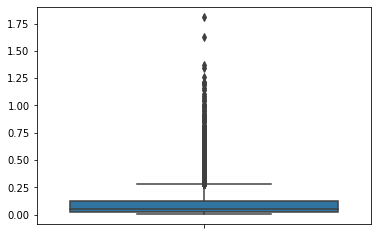

In [105]:
sns.boxplot(pd.DataFrame(list(filter(lambda i : False if i == 0 else i, np.asarray(pd.read_json('final_watch.json').set_index('index')).reshape(1,-1)[0]))), orient='v')

In [42]:
import seaborn as sns

In [44]:
dat.describe()
# 0 : 0 ~ 0.027510
# 1 : 0.027510 ~ 0.039329
# 2 : 0.039320 ~ 0.056302
# 3 : 0.056302 ~

count    144.000000
mean       0.042860
std        0.017950
min        0.013510
25%        0.027510
50%        0.039329
75%        0.056302
max        0.096978
dtype: float64

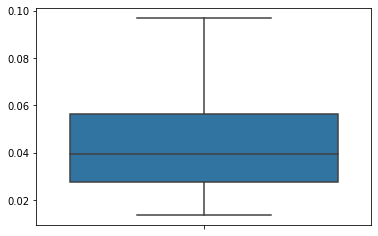

In [43]:
sns.boxplot(dat, orient='v')

In [134]:
weather_df['day'] = list(map(lambda i : i.split()[0], weather_df['time']))
weather_df['hour'] = list(map(lambda i : i.split()[1], weather_df['time']))

In [6]:
watch_df[weather_df['hour'][0:30]][weather_df['day'][0]]

KeyError: '2019-01-01'

In [137]:
weather_df

,time,fin_tem,fin_hum,fin_rain,fin_snow,day,hour
0,2019-01-01 00:00,-3.307244,49.762698,0.0,0.014997,2019-01-01,00:00
1,2019-01-01 01:00,-3.754777,51.217101,0.0,0.003601,2019-01-01,01:00
2,2019-01-01 02:00,-4.248918,54.346114,0.0,0.003601,2019-01-01,02:00
3,2019-01-01 03:00,-4.608119,57.098790,0.0,0.014997,2019-01-01,03:00
4,2019-01-01 04:00,-4.823198,57.744442,0.0,0.003601,2019-01-01,04:00
...,...,...,...,...,...,...,...
8755,2019-12-31 19:00,-4.247262,39.818355,0.0,0.002406,2019-12-31,19:00
8756,2019-12-31 20:00,-4.568535,41.758622,0.0,0.002406,2019-12-31,20:00
8757,2019-12-31 21:00,-5.015240,43.616030,0.0,0.002406,2019-12-31,21:00
8758,2019-12-31 22:00,-5.524580,44.290348,0.0,0.002406,2019-12-31,22:00


In [196]:
weather_df['watch'] = list(map(lambda i : temp[i['day']][i['hour']], weather_df.iloc))

In [197]:
norm_df = weather_df.describe()

In [198]:
weather_df

,time,fin_tem,fin_hum,fin_rain,fin_snow,day,hour,watch
0,2019-01-01 00:00,-1.784033,-0.777506,-0.242217,0.232456,2019-01-01,00:00,2
1,2019-01-01 01:00,-1.830264,-0.696178,-0.242217,-0.018834,2019-01-01,01:00,0
2,2019-01-01 02:00,-1.881311,-0.521210,-0.242217,-0.018834,2019-01-01,02:00,3
3,2019-01-01 03:00,-1.918417,-0.367285,-0.242217,0.232456,2019-01-01,03:00,2
4,2019-01-01 04:00,-1.940636,-0.331181,-0.242217,-0.018834,2019-01-01,04:00,1
...,...,...,...,...,...,...,...,...
8755,2019-12-31 19:00,-1.881140,-1.333576,-0.242217,-0.045190,2019-12-31,19:00,0
8756,2019-12-31 20:00,-1.914328,-1.225079,-0.242217,-0.045190,2019-12-31,20:00,3
8757,2019-12-31 21:00,-1.960474,-1.121217,-0.242217,-0.045190,2019-12-31,21:00,2
8758,2019-12-31 22:00,-2.013091,-1.083510,-0.242217,-0.045190,2019-12-31,22:00,2


In [199]:
norm_df.drop('watch', axis=1, inplace=True)

In [39]:
(weather_df['fin_tem'] - norm_df['fin_tem']['mean']) / norm_df['fin_tem']['std']

0      -1.784033
1      -1.830264
2      -1.881311
3      -1.918417
4      -1.940636
          ...   
8755   -1.881140
8756   -1.914328
8757   -1.960474
8758   -2.013091
8759   -2.001353
Name: fin_tem, Length: 8760, dtype: float64

In [200]:
# Normalization Packaging
def normalize(df, x):
    df[x] = (df[x] - norm_df[x]['mean']) / norm_df[x]['std']
    
for n in norm_df:
    normalize(weather_df, n)



In [201]:
weather_df.corr()

,fin_tem,fin_hum,fin_rain,fin_snow,watch
fin_tem,1.000000,0.274100,0.152980,-0.133976,0.053594
fin_hum,0.274100,1.000000,0.283961,0.043160,-0.117520
fin_rain,0.152980,0.283961,1.000000,0.043287,-0.002520
fin_snow,-0.133976,0.043160,0.043287,1.000000,-0.009467
watch,0.053594,-0.117520,-0.002520,-0.009467,1.000000


In [48]:
import numpy as np

In [202]:
X = np.asarray(weather_df[['fin_tem', 'fin_hum', 'fin_rain', 'fin_snow']])

In [203]:
y = np.asarray(weather_df['watch'])

In [204]:
X

array([[-1.78403267, -0.77750589, -0.24221735,  0.23245615],
       [-1.83026425, -0.69617825, -0.24221735, -0.01883443],
       [-1.88131068, -0.5212095 , -0.24221735, -0.01883443],
       ...,
       [-1.96047435, -1.12121651, -0.24221735, -0.04519021],
       [-2.01309079, -1.08350986, -0.24221735, -0.04519021],
       [-2.0013532 , -0.99897927, -0.24221735, -0.04519021]])

In [205]:
y

array([2, 0, 3, ..., 2, 2, 3], dtype=int64)

In [206]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 5)
ada = AdaBoostClassifier(base_estimator=rf,learning_rate = 0.5, n_estimators=100)

In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2)

In [208]:
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                          

In [222]:
y_pred = ada.predict(X_test)

In [227]:
ada.score(X_test, y_test)

0.2465753424657534

In [224]:
set(y_pred)

{0, 1, 2, 3}

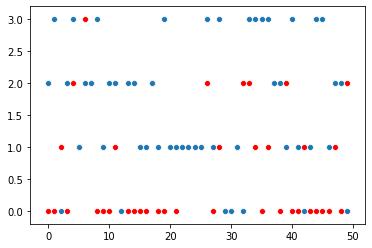

In [223]:
import seaborn as sns
x_temp = [i for i in range(len(y_pred))]
sns.scatterplot(x_temp[:50], y_pred[:50], color='r')
sns.scatterplot(x_temp[:50], y_test[:50])

In [229]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [231]:
lr.score(X_test, y_test)

0.2990867579908676

In [217]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred

In [1]:
# 피쳐로 그냥 쓸것인가
# 시청률에 영향을 미치는 피처로 학습시킬것인가
# 시청률 범위 -30 ~ +30



In [2]:
import pandas as pd

In [10]:
# ' '.join(pd.read_json(r'C:\Users\svsta\big_contest\datas\out_data\11st_item.json')['item_name'][:500])

In [11]:
# 한글 '[가-힣]{2,}'

In [40]:
def search(reg, datas):
        if type(datas) != list:
            datas = [datas]
        result = [list(re.finditer(reg, d)) for d in datas]
        # features = []
        # for r in result:
        #     features.extend(list(map(lambda i : i.group(), r)))
        
        return [list(map(lambda i : i.group(), r)) for r in result]

In [4]:
import pandas as pd

In [6]:
import re

In [45]:
eleven_df = pd.read_json(r'C:\Users\svsta\big_contest\datas\out_data\11st_item.json')

In [47]:
eleven_df['tokens'] = product_tokens

In [60]:
eleven_df[['type','tokens']].to_json('11st_tokens.json')

In [42]:
product_tokens = search('[가-힣]{2,}', list(pd.read_json(r'C:\Users\svsta\big_contest\datas\out_data\11st_item.json')['item_name']))

In [41]:
len(set(product_tokens))

TypeError: unhashable type: 'list'

In [61]:
ebs_tokens = search('[가-힣]{2,}', list(pd.read_json('datas/out_data/ebs.json')['content']))

TypeError: expected string or bytes-like object

In [17]:
len(set(ebs_tokens))

585

In [121]:
# ebs_df = pd.read_json('datas/out_data/ebs.json')
home_df = pd.read_json('datas/out_data/homeandshop.json')
# hyundai_df = pd.read_json('datas/out_data/hyundaireal.json')
# jtbc_df = pd.read_json('datas/out_data/jtbc.json')

In [145]:
jtbc_df['sent'] = list(map(lambda i : i['title'] + ' ' + i['content'] if i['content'] != None else i['title'], jtbc_df.iloc))

In [103]:
import itertools

In [132]:
hyundai_df['title'] = list(map(lambda i : ' '.join(i), hyundai_df['title']))

In [133]:
# 

In [150]:
jtbc_df

,time,title,content,sent,tokens
0,2019-01-01 00:10\r\n ...,\r\n 고전적 하루 갈라콘서트 '...,\r\n ‘고...,\r\n 고전적 하루 갈라콘서트 '...,"[고전적, 하루, 갈라콘서트, 멋진, 신세계, 고전적, 하루, 선을, 보인, 온라인..."
1,2019-01-01 01:50\r\n ...,\r\n JTBC 스페셜 다큐멘터리...,None,\r\n JTBC 스페셜 다큐멘터리...,"[스페셜, 다큐멘터리, 위대한, 영국, 이야기, 민중의, 역사]"
2,2019-01-01 03:00\r\n ...,\r\n JTBC 스페셜 다큐멘터리...,None,\r\n JTBC 스페셜 다큐멘터리...,"[스페셜, 다큐멘터리, 위대한, 영국, 이야기, 민중의, 역사]"
3,2019-01-01 04:10\r\n ...,\r\n 잡스\r\n ...,\r\n 밥벌...,\r\n 잡스\r\n ...,"[잡스, 밥벌이, 연구소, 잡스, 열한, 번째, 연구, 대상, 성우, 다양한, 미디..."
4,2019-01-01 05:20\r\n ...,\r\n 차이나는 클라스 - 강의노...,\r\n 질문은 모든...,\r\n 차이나는 클라스 - 강의노...,"[차이나는, 클라스, 강의노트, 질문은, 모든, 새로운, 것의, 시작, 질문이, 사..."
...,...,...,...,...,...
7051,2019-12-31 18:20\r\n ...,\r\n JTBC 이 시각 뉴스룸 ...,None,\r\n JTBC 이 시각 뉴스룸 ...,"[시각, 뉴스룸]"
7052,2019-12-31 18:25\r\n ...,\r\n 아는 형님 2019 형님학...,\r\n ▶ ...,\r\n 아는 형님 2019 형님학...,"[아는, 형님, 형님학교, 종업식, 해를, 돌아보는, 시간, 형님학교, 종업식, 티..."
7053,2019-12-31 19:55\r\n ...,\r\n JTBC 뉴스룸\r\n ...,"\r\n 사실, 공정...",\r\n JTBC 뉴스룸\r\n ...,"[뉴스룸, 사실, 공정, 균형, 품위, 한걸음, 들어가는, 뉴스, 뉴스룸은, 뉴스가..."
7054,2019-12-31 21:30\r\n ...,\r\n JTBC 연말 특선 꾼\r...,None,\r\n JTBC 연말 특선 꾼\r...,"[연말, 특선]"


In [147]:
temp = search('[가-힣]{2,}', list(map(lambda i : str(i), jtbc_df['sent'])))

In [148]:
jtbc_df['tokens'] = temp

In [149]:
jtbc_df[['time', 'tokens']].to_json('jtbc_tokens.json')

In [1]:
import pandas as pd

In [3]:
tv_df = pd.read_json(r'C:\Users\svsta\big_contest\datas\token_data\ebs_tokens.json')

In [7]:
tv_df = pd.concat([tv_df, pd.read_json(r'C:\Users\svsta\big_contest\datas\token_data\jtbc_tokens.json')])

In [27]:
import numpy as np

In [34]:
tv_df.reset_index(inplace=True)

In [37]:
tv_df = tv_df[['time','tokens','category']]

In [41]:
tv_df['time'] = tv_df['time'].apply(lambda i :i.rstrip())

In [43]:
tv_df.to_json('tv_program.json')

In [44]:
import pandas as pd

In [45]:
pd.read_json('final_watch.json')

,index,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
0,00:00,0.120,0.040,0.014,0.223,0.663,0.451,0.000,0.000,0.035,...,0.000,0.467,0.083,0.171,0.156,0.261,0.115,0.004,0.080,0.032
1,01:00,0.024,0.000,0.009,0.000,0.414,0.012,0.069,0.000,0.025,...,0.994,0.042,0.000,0.000,0.039,0.000,0.000,0.000,0.155,0.096
2,02:00,0.317,0.544,0.450,0.032,0.000,0.070,0.008,0.646,0.024,...,0.015,0.000,0.353,0.378,0.054,0.000,0.079,0.280,0.076,0.028
3,03:00,0.160,0.143,0.626,0.039,0.006,0.100,0.064,0.064,0.230,...,0.329,0.245,0.523,0.044,0.062,0.821,0.060,0.164,0.136,0.060
4,04:00,0.030,0.040,0.032,0.071,0.000,0.058,0.028,0.012,0.000,...,0.171,0.387,0.068,0.176,0.083,0.036,0.046,0.043,0.103,0.415
5,05:00,0.789,0.025,0.051,0.027,0.000,0.023,0.051,0.023,0.129,...,0.022,0.166,0.000,0.103,0.437,0.854,0.000,0.090,0.005,0.000
6,06:00,0.000,0.136,0.126,0.686,0.840,0.253,0.179,0.156,0.193,...,0.000,0.000,0.016,0.000,0.036,0.449,0.000,0.031,0.022,0.000
7,07:00,0.000,0.070,0.103,0.132,0.490,0.028,0.080,0.045,0.139,...,0.000,0.000,0.022,0.000,0.015,0.000,0.080,0.134,0.000,0.079
8,08:00,0.072,0.033,0.040,0.011,0.030,0.088,0.167,0.000,0.012,...,0.034,0.290,0.278,0.494,0.294,0.000,0.100,0.004,0.052,0.010
9,09:00,0.137,0.018,0.096,0.173,0.012,0.000,0.016,0.508,0.000,...,0.084,0.494,0.716,0.163,0.150,0.070,0.041,0.810,0.290,1.048
